In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time


## Torch libraries

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
import torch.utils.data as data

# Generating the data base:
## First, we download the original images and fixation maps.
This requires having internet connexion

Size of the Folder 'ALLSTIMULI' : 225 Mo

Size of the Folder 'ALLFIXATIONMAPS' : 23,6 Mo

In [3]:
if not(os.path.exists('ALLSTIMULI')):
    from io import BytesIO
    from zipfile import ZipFile
    from urllib.request import urlopen
    img='http://people.csail.mit.edu/tjudd/WherePeopleLook/ALLSTIMULI.zip'
    resp = urlopen(img)
    zipfile = ZipFile(BytesIO(resp.read()))
    zipfile.extractall()
    print('Download of ALLSTIMULI complete')
if not(os.path.exists('ALLFIXATIONMAPS')):
    from io import BytesIO
    from zipfile import ZipFile
    from urllib.request import urlopen
    img='http://people.csail.mit.edu/tjudd/WherePeopleLook/ALLFIXATIONMAPS.zip'
    resp = urlopen(img)
    zipfile = ZipFile(BytesIO(resp.read()))
    zipfile.extractall()
    print('Download of ALLFIXATIONMAPS complete')

## Then, we generate the global images data base.
The images and fixations are 1003 grey images in numpy files of size 256x256, with memory space of 65 Ko each.

In total, we have:

GLOBAL_IMAGES :  59,7 Mo

GLOBAL_FIXATIONMAPS :    59,7 Mo

GLOBAL_IMAGES_TEST :        3,06 Mo

GLOBAL_FIXATIONMAPS_TEST : 3,06 Mo

In total we have 125.72 Mo

In [4]:
#size used for downsizing images
size=256
test_sample_ratio=5/100
#folder names
imdir_org,fixdir_org='ALLSTIMULI/ALLSTIMULI','ALLFIXATIONMAPS/ALLFIXATIONMAPS'
#imdir_new,fixdir_new='GLOBAL_IMAGES','GLOBAL_FIXATIONMAPS'
#imdir_test,fixdir_test='GLOBAL_IMAGES_TEST','GLOBAL_FIXATIONMAPS_TEST'
#creating empty folders:

imdir, fixdir = 'GLOBAL_IMAGES_ALL_PLAIN','GLOBAL_FIXATIONMAPS_ALL_PLAIN'
imdir_white, fixdir_white = 'GLOBAL_IMAGES_ALL_WHITE','GLOBAL_FIXATIONMAPS_ALL_WHITE'



In [5]:
for directory in [imdir,fixdir]:
    if not os.path.exists(directory):
        os.makedirs(directory)
#image and fixation names
import fnmatch #fnmatch to keep only image files
image_files =fnmatch.filter(os.listdir(imdir_org), '*.jpeg')
fixation_files = []
for image_name in image_files:
    fixation_files.append(image_name[:-5] +'_fixMap.jpg')
#number of images : 1003
N=len(image_files)
#N_test=int(l*test_sample_ratio)
#N_train=l-N_test
print('Total number of images :', N)
#import SLIP for whitening and PIL for resizing
import SLIP
import PIL
#default parameters for the whitening
im = SLIP.Image(pe='https://raw.githubusercontent.com/bicv/LogGabor/master/default_param.py')

Total number of images : 1003


In [6]:
#print(os.listdir(imdir_org))

In [7]:
if False : #not os.path.exists(imdir):
    for idx in range(N):
        if idx%100==0:
            print('Avancement=',int(idx/N*100),'%')
        #check if file exists
        '''if idx<=N_train:
            img_dir,fix_dir=imdir_new,fixdir_new
        else:
            img_dir,fix_dir=imdir_test,fixdir_test'''
        #if not (os.path.exists(os.path.join(img_dir,image_files[idx][:-5])) and os.path.exists(os.path.join(fix_dir,fixation_files[idx][:-4])) ):
        #loading images and fixations
        img_name = os.path.join(imdir_org,image_files[idx])
        fix_name = os.path.join(fixdir_org,fixation_files[idx])
        image = PIL.Image.open(img_name)
        fixation=PIL.Image.open(fix_name)
        #resizing
        image=image.resize((size,size))
        fixation=fixation.resize((size,size))
        #saving in a temporary file:
        image.save('temp_image.jpeg')
        #whitening
        image=im.imread('temp_image.jpeg')
            ##whitening only works for pair shape
        raws=image.shape[0]
        columns=image.shape[1]
        if raws%2!=0:
            image=image[:-1,:]
            fixation=fixation[:-1,:]
        if columns%2!=0:
            image=image[:,:-1]
            fixation=fixation[:,:-1]
        raws=image.shape[0]
        columns=image.shape[1]
        im.set_size((raws,columns))
            ##apply whitening
        image = im.whitening(image)
        image = ((image - image.min()) * (1/(image.max() - image.min()) * 255)).astype('uint8')
        #saving
        '''if idx<=N_train:
            img_dir,fix_dir=imdir_new,fixdir_new
        else:
            img_dir,fix_dir=imdir_test,fixdir_test'''
        np.save(os.path.join(imdir,image_files[idx][:-5]), np.array(image,dtype=np.uint8))
        np.save(os.path.join(fixdir,fixation_files[idx][:-4]), np.array(fixation,dtype=np.uint8))
    print('Avancement= 100 %')
    print('COMPLETE : GLOBAL IMAGES AND FIXATION MAPS GENERATED SUCCESSFULLY.')

### Tests

In [8]:
i = 0

'''image_ref_dir = imdir_org
image_ref_names=os.listdir(image_ref_dir)
image_ref=np.load(os.path.join(image_ref_dir,image_ref_names[i]))

fix_ref_dir = fixdir_org
fix_ref_names=os.listdir(fix_ref_dir)
fix_ref=np.load(os.path.join(fix_ref_dir,fix_ref_names[i]))'''

image_dir = imdir #imdir_new
image_names=os.listdir(image_dir)
image=np.load(os.path.join(image_dir,image_names[i]))

image_dir_white = imdir_white #imdir_new
image_white_names=os.listdir(image_dir_white)
image_white=np.load(os.path.join(image_dir_white,image_names[i]))

fix_dir = fixdir #fixdir_new
fix_names=os.listdir(fix_dir)
fix=np.load(os.path.join(fix_dir,fix_names[i]))


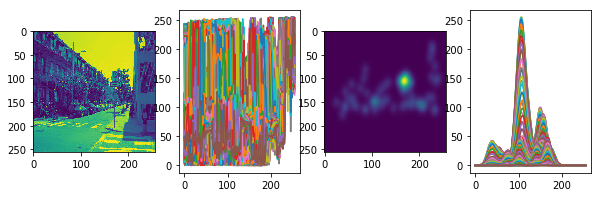

In [9]:
plt.figure(figsize = (10,3))
'''plt.subplot(141)
plt.imshow(image_ref)
plt.subplot(142)
_ = plt.plot(fix_ref)'''
plt.subplot(141)
plt.imshow(image)
plt.subplot(142)
_ = plt.plot(image)
plt.subplot(143)
plt.imshow(fix)
plt.subplot(144)
_ = plt.plot(fix)

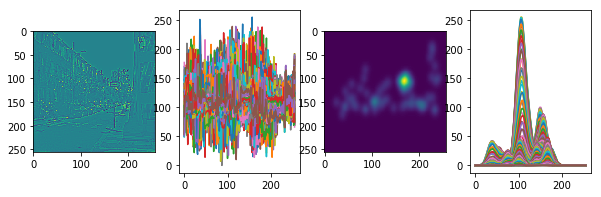

In [10]:
plt.figure(figsize = (10,3))
'''plt.subplot(141)
plt.imshow(image_ref)
plt.subplot(142)
_ = plt.plot(fix_ref)'''
plt.subplot(141)
plt.imshow(image_white)
plt.subplot(142)
_ = plt.plot(image_white)
plt.subplot(143)
plt.imshow(fix)
plt.subplot(144)
_ = plt.plot(fix)

## Vision stuff

In [11]:
from LogGabor import LogGabor

In [12]:
N_theta, N_azimuth, N_eccentricity, N_phase, N_X, N_Y, rho = 6, 18, 12, 2, 256, 256, 1.31 #1.41 #1.25 #
#N_theta, N_azimuth, N_eccentricity, N_phase, N_X, N_Y, rho = 6, 12, 8, 2, 256, 256, 1.41
verbose = 1
OFFSET_STD = 10
OFFSET_MAX = 25

## Pierre's stuff

### Encoding : N_theta x N_azimuth x N_eccentricity x N_phase  2D filters (to be applied on N_X x N_Y pixels)

#### Préparer l'apprentissage et les fonctions nécessaires au fonctionnement du script

In [13]:
def vectorization(N_theta=N_theta, N_azimuth=N_azimuth, N_eccentricity=N_eccentricity, N_phase=N_phase, \
                  N_X=N_X, N_Y=N_Y, rho=rho, ecc_max=1, B_sf=.4, B_theta=np.pi/N_theta/2):
    retina = np.zeros((N_theta, N_azimuth, N_eccentricity, N_phase, N_X*N_Y))
    parameterfile = 'https://raw.githubusercontent.com/bicv/LogGabor/master/default_param.py'
    lg = LogGabor(parameterfile)
    lg.set_size((N_X, N_Y))
    # params = {'sf_0': .1, 'B_sf': lg.pe.B_sf,
    #           'theta': np.pi * 5 / 7., 'B_theta': lg.pe.B_theta}
    # phase = np.pi/4
    # edge = lg.normalize(lg.invert(lg.loggabor(
    #     N_X/3, 3*N_Y/4, **params)*np.exp(-1j*phase)))

    for i_theta in range(N_theta):
        for i_azimuth in range(N_azimuth):
            for i_eccentricity in range(N_eccentricity):
                ecc = ecc_max * (1/rho)**(N_eccentricity - i_eccentricity)
                r = np.sqrt(N_X**2+N_Y**2) / 2 * ecc  # radius
                sf_0 = 0.5 * 0.03 / ecc
                x = N_X/2 + r * \
                    np.cos((i_azimuth+(i_eccentricity % 2)*.5)*np.pi*2 / N_azimuth)
                y = N_Y/2 + r * \
                    np.sin((i_azimuth+(i_eccentricity % 2)*.5)*np.pi*2 / N_azimuth)
                for i_phase in range(N_phase):
                    params = {'sf_0': sf_0, 'B_sf': B_sf,
                              'theta': i_theta*np.pi/N_theta, 'B_theta': B_theta}
                    phase = i_phase * np.pi/2
                    # print(r, x, y, phase, params)

                    retina[i_theta, i_azimuth, i_eccentricity, i_phase, :] = lg.normalize(
                        lg.invert(lg.loggabor(x, y, **params)*np.exp(-1j*phase))).ravel()


    return retina

#### Full encoding

In [14]:
#del retina

In [15]:
FIC_NAME = 'retina_256_18_ecc_12.npy'
if not os.path.exists(FIC_NAME):
    retina = vectorization(N_theta, N_azimuth, N_eccentricity, N_phase, N_X, N_Y, rho) #, ecc_max=1)
    np.save(FIC_NAME, retina)
else:
    retina = np.load(FIC_NAME)
print(retina.shape)


(6, 18, 12, 2, 65536)


In [16]:
retina_vector = retina.reshape((N_theta*N_azimuth*N_eccentricity*N_phase, N_X*N_Y))
print(retina_vector.shape)

(2592, 65536)


In [17]:
FIC_NAME = 'retina_inverse_256_18_ecc_12.npy'
if not os.path.exists(FIC_NAME):
    retina_inverse = np.linalg.pinv(retina_vector)
    np.save(FIC_NAME, retina_inverse)
else:
    retina_inverse = np.load(FIC_NAME)
print(retina_inverse.shape)

(65536, 2592)


#### Orientation invariant power encoding (colliculus??)

In [18]:
colliculus = (retina**2).sum(axis=(0, 3))
colliculus = colliculus**.5
colliculus /= colliculus.sum(axis=-1)[:, :, None]
print(colliculus.shape)

(18, 12, 65536)


In [19]:
colliculus_vector = colliculus.reshape((N_azimuth*N_eccentricity, N_X*N_Y))
print(colliculus_vector.shape)

(216, 65536)


In [20]:
colliculus_inverse = np.linalg.pinv(colliculus_vector)
print(colliculus_inverse.shape)

(65536, 216)


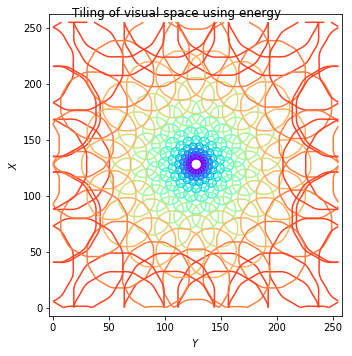

In [21]:
energy = colliculus ** 2
energy /= energy.sum(axis=-1)[:, :, None]
energy_vector = energy.reshape((N_azimuth*N_eccentricity, N_X*N_Y))
energy_plus = np.linalg.pinv(energy_vector)
FIG_WIDTH = 5 

fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
for i_orient in range(N_azimuth):
    for i_scale in range(N_eccentricity):
        env = np.sqrt(energy[i_orient, i_scale, :]**2.5).reshape((N_X, N_Y))
        ax.contour(energy[i_orient, i_scale, :].reshape((N_X, N_Y)), levels=[env.max()/2], lw=1,
                  colors=[plt.cm.rainbow(i_scale * 1.5/N_azimuth)])
fig.suptitle('Tiling of visual space using energy')
ax.set_xlabel(r'$Y$')
ax.set_ylabel(r'$X$')
ax.axis('equal')
plt.tight_layout()

## Images dataset

In [22]:
im = SLIP.Image(pe='https://raw.githubusercontent.com/bicv/LogGabor/master/default_param.py')

class Transform(object):
    """Rescale the image through LogGabors

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self):
        #assert isinstance(output_size, (int, tuple))
        #self.output_size = output_size
        pass

    def __call__(self, sample):
        image, image_white, fixmap = sample['image'], sample['image_white'], sample['fixation']
        #image = PIL.Image.fromarray(image)
        #image = im.whitening(image)
        #image = np.array(image,dtype=np.uint8)
        image_retina = retina_vector @ np.ravel(image_white)
        image_retina /= np.std(image_retina)
        image_colliculus = colliculus_vector @ np.ravel(image)
        image_colliculus /= np.std(image_colliculus)
        fixmap_colliculus = colliculus_vector @ np.ravel(fixmap)
        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively

        return {'image': image_colliculus, 'image_white': image_retina, 'fixation': fixmap_colliculus}

In [23]:
## test

In [24]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, image_white, fixmap = sample['image'], sample['image_white'], sample['fixation']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        #image = image.transpose((2, 0, 1))
        
        return {'image': torch.from_numpy(image),
                'image_white': torch.from_numpy(image_white),
                'fixation': torch.from_numpy(landmarks)}

In [25]:
class ImageDataset(data.Dataset):
    """image dataset."""

    def __init__(self, imdir, imdir_white, fixdir, transform=None, index = None):
        """
        Args:
            imdir (string): Path to the image folder
            fixdir (string): Path to the fixation maps folder
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.imdir = imdir
        self.fixdir = fixdir
        self.imdir_white = imdir_white
        if index is None :
            print('OK')
            self.image_names=os.listdir(imdir)
            self.fix_names=os.listdir(fixdir)
        else:
            self.image_names=np.array(os.listdir(imdir))[index]
            self.fix_names=np.array(os.listdir(fixdir))[index]
        self.transform = transform # we do not use transforms
        #self.data_loader=data.DataLoader(self,batch_size=batch_size) : did not work
        
    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        image=np.load(os.path.join(self.imdir,self.image_names[idx]))
        image_white=np.load(os.path.join(self.imdir_white,self.image_names[idx]))
        fix_map=np.load(os.path.join(self.fixdir,self.fix_names[idx]))/255 # to transform between 0 and 1 (for the BCELoss to work)

        sample = {'image': image, 'image_white': image_white, 'fixation': fix_map}

        if self.transform:
            sample = self.transform(sample)
        
        return sample


### Tests

In [26]:
dataset = ImageDataset(image_dir,image_dir_white,fix_dir)

OK


In [27]:
i = 0
sample = dataset[i] #['image'], dataset[i]['fixation'] 

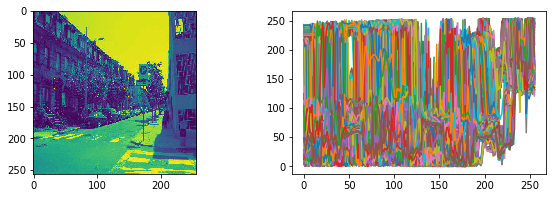

In [28]:
plt.figure(figsize = (10,3))
plt.subplot(121)
plt.imshow(sample['image'])
plt.subplot(122)
_ = plt.plot(sample['image'])

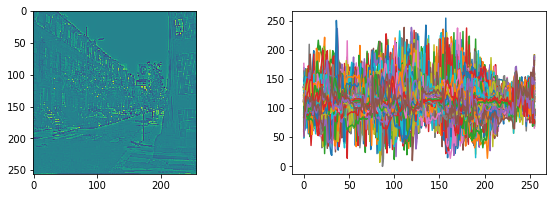

In [29]:
plt.figure(figsize = (10,3))
plt.subplot(121)
plt.imshow(sample['image_white'])
plt.subplot(122)
_ = plt.plot(sample['image_white'])

In [30]:
'''train = True
batch_size = 10
data_loader = torch.utils.data.DataLoader(dataset, train=train, download=True, batch_size=batch_size, shuffle=True)'''
dataloader = data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=4)

In [31]:
batch = next(iter(dataloader))

In [32]:
batch['image'].shape

torch.Size([10, 256, 256])

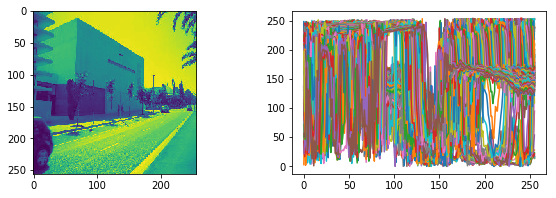

In [33]:
plt.figure(figsize = (10,3))
plt.subplot(121)
plt.imshow(batch['image'][0,:,:])
plt.subplot(122)
_ = plt.plot(batch['image'][0,:,:])

### Encoding test

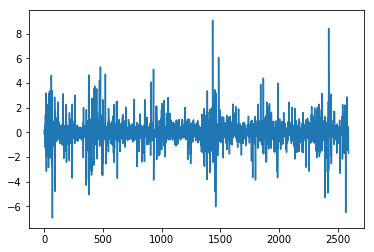

In [34]:
trans = Transform()
sample_retina = trans(sample) #retina_vector @ np.ravel(sample['image'])
plt.plot(sample_retina['image_white'])

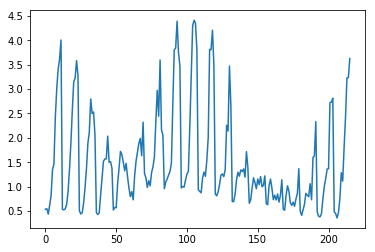

In [35]:
trans = Transform()
sample_retina = trans(sample) #retina_vector @ np.ravel(sample['image'])
plt.plot(sample_retina['image'])

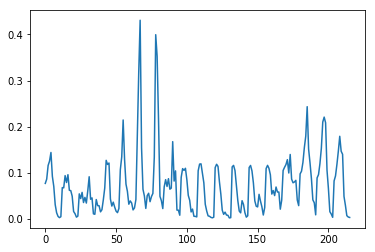

In [36]:
#data_colliculus = colliculus_vector @ np.ravel(sample['fixation'])
plt.plot(sample_retina['fixation'])

In [37]:
### Polar plot

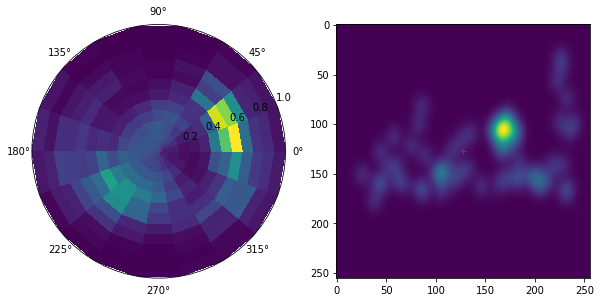

In [38]:
delta = 1/N_azimuth
log_r, theta = np.meshgrid(np.linspace(0, 1, N_eccentricity + 1), np.linspace(-np.pi*(.5 + delta), np.pi*(1.5 - delta), N_azimuth + 1))
f = plt.figure(figsize = (10,5))
ax = f.add_subplot(121, projection='polar')
vec = sample_retina['fixation']
ax.pcolor(theta, log_r, vec.reshape((N_azimuth, N_eccentricity)))
plt.plot(0,0, 'r+')
ax = f.add_subplot(122)
plt.imshow(sample['fixation'])
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

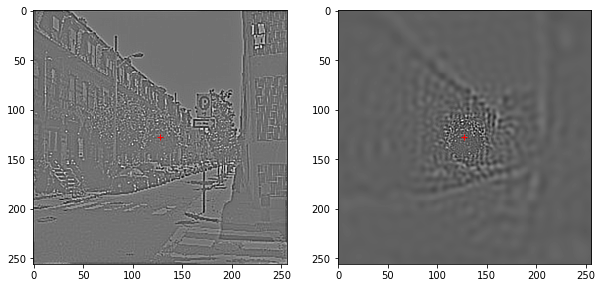

In [39]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(sample['image_white'], cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

plt.subplot(122)
data_retina = sample_retina['image_white']
image_white = retina_inverse @ data_retina
#im = colliculus_inverse @ data_retina
plt.imshow(image_white.reshape(N_X, N_Y), cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

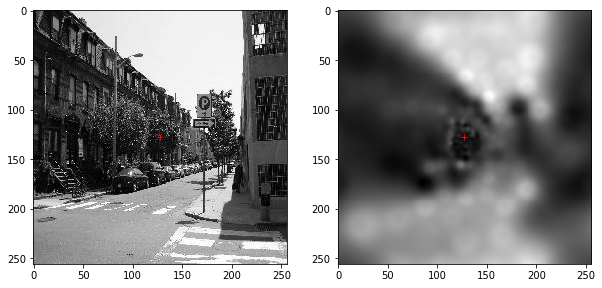

In [40]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(sample['image'], cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

plt.subplot(122)
data_retina = sample_retina['image']
image = colliculus_inverse @ data_retina
#im = colliculus_inverse @ data_retina
plt.imshow(image.reshape(N_X, N_Y), cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

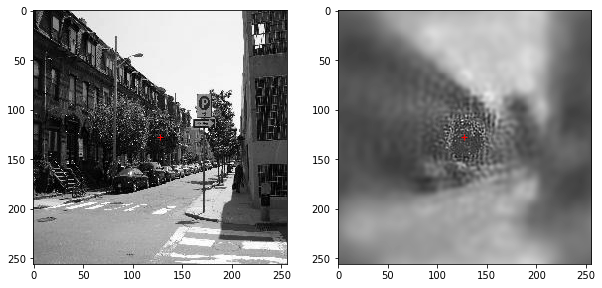

In [41]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(sample['image'], cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

plt.subplot(122)
plt.imshow(10 * image_white.reshape(N_X, N_Y)+image.reshape(N_X, N_Y), cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')


#### Input vectors encoding

In [42]:
'''def image_fullfield(image):
    image_retina = retina_vector @ np.ravel(image)
    return image_retina'''

'def image_fullfield(image):\n    image_retina = retina_vector @ np.ravel(image)\n    return image_retina'

#### Output vectors (Accuracy/Saliency map) encoding

In [43]:
'''def fixmap_fullfield(fixmap):   
    fixmap_colliculus = colliculus_vector @ np.ravel(fixmap)
    return fixmap_colliculus'''

'def fixmap_fullfield(fixmap):   \n    fixmap_colliculus = colliculus_vector @ np.ravel(fixmap)\n    return fixmap_colliculus'

In [44]:
'''def couples(image, fixmap): #, device):
    #data = data.to(device)
    v = image_fullfield(data)
    a = fixmap_fullfield(fixmap)
    return (v, a)'''

'def couples(image, fixmap): #, device):\n    #data = data.to(device)\n    v = image_fullfield(data)\n    a = fixmap_fullfield(fixmap)\n    return (v, a)'

#### Hyperparameters

In [45]:
minibatch_size = 10  # quantity of examples that'll be processed
lr = 1e-4 #0.05

n_hidden1_white = 800 #800
n_hidden1 = 200 #800
n_hidden2 = 50
n_hidden3 = 10
n_hidden4 = 50

print('n_hidden1', n_hidden1, ' / n_hidden2', n_hidden2)
verbose = 1
train = True

n_hidden1 200  / n_hidden2 50


In [46]:
800 // N_theta // N_phase

66

In [47]:
do_cuda = False # torch.cuda.is_available()
kwargs = {'num_workers': 4, 'pin_memory': True} if do_cuda else {}
device = torch.cuda.device("cuda" if do_cuda else "cpu")

In [48]:
transform = Transform()

image_dir = imdir #'GLOBAL_IMAGES_ALL'
fix_dir = fixdir #'GLOBAL_FIXATIONMAPS_ALL'

'''image_names=os.listdir(image_dir)
print (len(image_names))
fix_names=os.listdir(fix_dir)
print (len(fix_names))
for i in range(len(image_names)):
    if image_names[i][:7] != fix_names[i][:7]:
        print(image_names[i], fix_names[i])'''

n = len(os.listdir(image_dir))
index = np.arange(n)
np.random.shuffle(index)
print(index)
index_train = index[:800]
index_test = index[800:]

train_dataset = ImageDataset(image_dir, image_dir_white, fix_dir, transform = transform, index = index_train)
train_loader = data.DataLoader(train_dataset, batch_size=minibatch_size, shuffle=True, num_workers=4)

test_dataset = ImageDataset(image_dir, image_dir_white, fix_dir, transform = transform, index = index_test)
test_loader = data.DataLoader(test_dataset, batch_size = len(test_dataset), shuffle=True, num_workers=4)

[ 73 699  51 ..., 692 765 186]


In [49]:
len(train_dataset)

800

In [50]:
'''for batch_idx, batch in enumerate(train_loader):
    print (batch_idx)'''

'for batch_idx, batch in enumerate(train_loader):\n    print (batch_idx)'

#### Network

In [51]:
class Net(torch.nn.Module):
    
    def __init__(self, n_feature, n_hidden1, n_hidden1_white, n_hidden2, n_hidden3, n_hidden4, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature // N_theta // N_phase, n_hidden1)
        self.hidden1_white = torch.nn.Linear(n_feature, n_hidden1_white)
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.hidden2_white = torch.nn.Linear(n_hidden1_white, n_hidden2)
        self.hidden3 = torch.nn.Linear(n_hidden2, n_hidden3)
        self.hidden4 = torch.nn.Linear(n_hidden3, n_hidden4)
        self.predict = torch.nn.Linear(n_hidden4, n_output)
        #self.dropout = nn.Dropout(p = 0.5) 
        
    def forward(self, image, image_white, do_leaky_relu=True):
        data_white = F.relu(self.hidden1_white(image_white))
        data = F.relu(self.hidden1(image))
        data = F.relu(self.hidden2(data) + self.hidden2_white(data_white))
        data = F.dropout(data, p = .5) #self.dropout)
        #data = F.relu(self.hidden3(data))
        data = self.hidden3(data)
        data = F.relu(self.hidden4(data))
        data =  self.predict(data)
        return data


In [52]:
net = Net(n_feature=N_theta*N_azimuth*N_eccentricity*N_phase,\
          n_hidden1=n_hidden1,\
          n_hidden1_white=n_hidden1_white,\
          n_hidden2=n_hidden2,\
          n_hidden3=n_hidden3,\
          n_hidden4=n_hidden4,\
          n_output=N_azimuth*N_eccentricity)

In [53]:
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [54]:
loss_func = torch.nn.BCEWithLogitsLoss()

In [55]:
def train(net, minibatch_size, \
          optimizer=optimizer, \
          vsize = N_theta * N_azimuth * N_eccentricity * N_phase,\
          asize = N_azimuth * N_eccentricity, \
          verbose=1):
    
    t_start = time.time()
    
    if verbose: print('Starting training...')
    
    for batch_idx, batch in enumerate(train_loader):
        optimizer.zero_grad()
        #minibatch_size = len(batch)
        #print(batch_idx, minibatch_size)
        
        '''log_image_batch = np.zeros((minibatch_size, 1, vsize))
        log_fixmap_batch = np.zeros((minibatch_size, 1, asize))
        # target = np.zeros((minibatch_size, asize))
        

        for idx in range(minibatch_size):
            log_image_batch[idx, 0, :], log_fixmap_batch[idx, 0, :] = couples(batch['image'][idx, :, :], batch['fixation'][idx, :, :])

        log_image_batch, log_fixmap_batch = Variable(torch.FloatTensor(log_image_batch)), Variable(torch.FloatTensor(log_fixmap_batch))
        '''
        log_image_batch = batch['image'].float()
        log_image_batch_white = batch['image_white'].float()
        log_fixmap_batch = batch['fixation'].float()
        
        prediction = net(log_image_batch, log_image_batch_white)
        loss = loss_func(prediction, log_fixmap_batch) 

        loss.backward()
        optimizer.step()

        if verbose and batch_idx % 10 == 0:
            print('[{}/{}] Loss: {} Time: {:.2f} mn'.format(
                batch_idx * minibatch_size, len(train_loader.dataset),
                loss.data.numpy(), (time.time()-t_start)/60))
    return net


In [56]:
def test(net, minibatch_size, optimizer=optimizer,
         vsize=N_theta*N_azimuth*N_eccentricity*N_phase,
         asize=N_azimuth*N_eccentricity):
    #for batch_idx, (data, label) in enumerate(test_loader):
    batch = next(iter(test_loader))
    batch_size = len(batch)
    
    '''log_image_batch = np.zeros((batch_size, 1, vsize))
    log_fixmap_batch = np.zeros((batch_size, 1, asize))
    
    for idx in range(batch_size):
        log_image_batch[idx, 0, :], log_fixmap_batch[idx, 0, :] = couples(batch['image'][idx, :, :], batch['fixation'][idx, :, :])
        #input_[idx, 0, :], a_data[idx, 0, :] = couples(data[idx, 0, :], i_offset, j_offset)
        #target[idx, :] = a_data[idx, 0, :]'''


    prediction = net(batch['image'].float(), batch['image_white'].float())
    loss = loss_func(prediction, batch['fixation'].float())

    return loss.data.numpy()


In [75]:
FIC_NAME = '2018-11-16-Malek recap.npy'
if not os.path.exists(FIC_NAME):
    for epoch in range(200) :#range(1, 100):
        train(net, minibatch_size)
        Accuracy = test(net, minibatch_size)
        print('Test set: Final Accuracy: {:.3f}'.format(Accuracy * 1.)) # print que le pourcentage de réussite final
    torch.save(net, FIC_NAME)    
else:
    net = torch.load(FIC_NAME)    

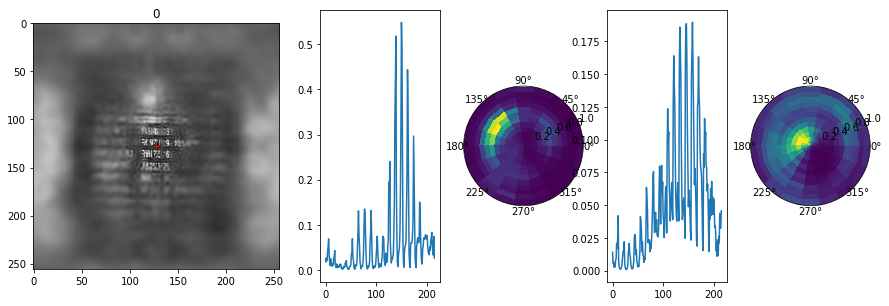

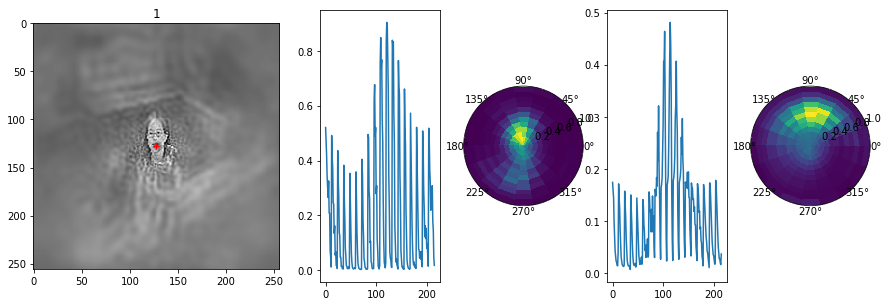

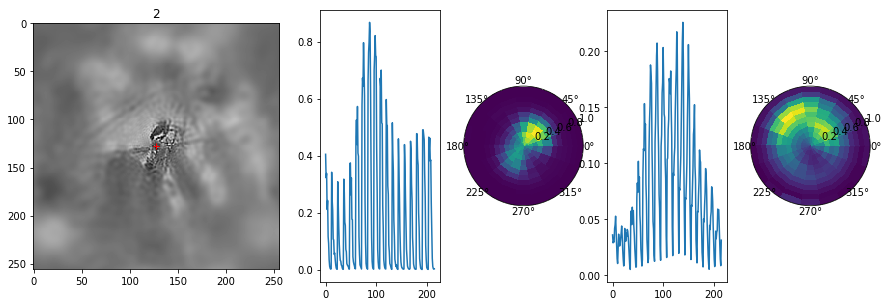

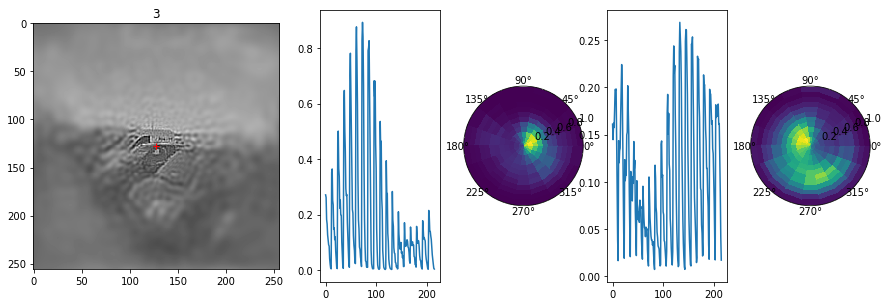

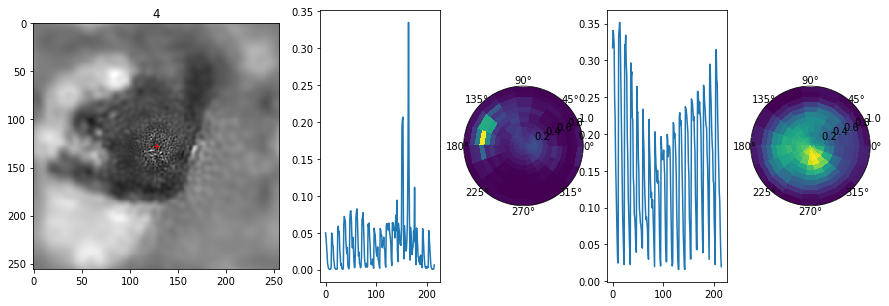

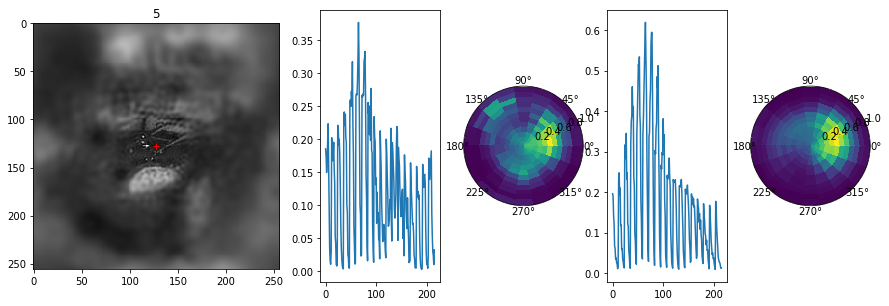

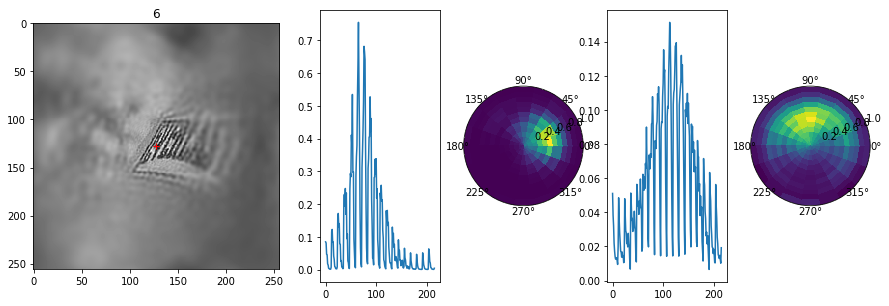

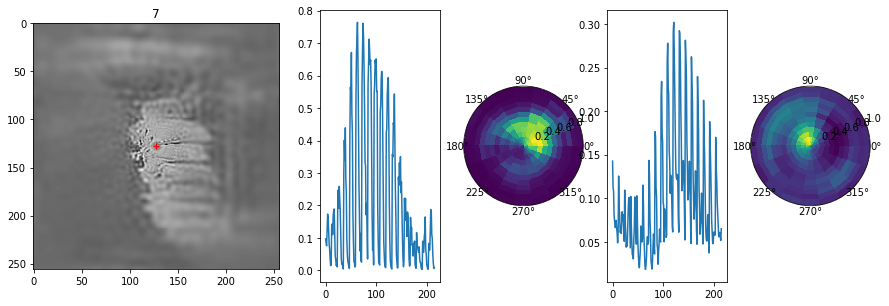

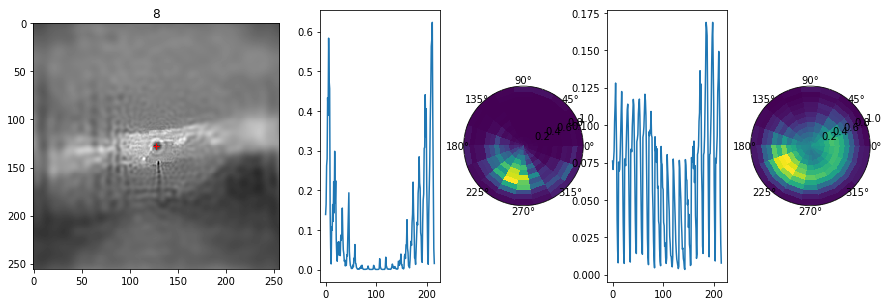

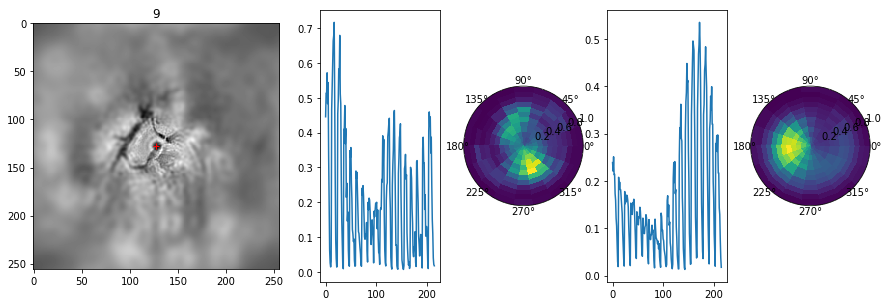

In [76]:
batch = next(iter(test_loader))
for _ in range(10):
    image = colliculus_inverse @ batch['image'][_,:]
    image_white = retina_inverse @ batch['image_white'][_,:]
    plt.figure(figsize = (15, 5))
    #plt.subplot(161)
    #plt.plot(batch['image_white'][_,:])
    plt.subplot(131)
    plt.imshow(image_white.reshape(N_X, N_X) * 20 + image.reshape(N_X, N_X) , cmap = 'gray')
    plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')
    plt.title(_)
    plt.subplot(163)
    plt.plot(batch['fixation'][_,:])    
    #col = colliculus_inverse @ batch['fixation'][_,:]
    ax = plt.subplot(164, projection='polar')
    vec = batch['fixation'][_,:]
    ax.pcolor(theta, log_r, vec.reshape((N_azimuth, N_eccentricity)))
    #plt.imshow(col.reshape(128, 128))
    in_ = batch['image'][_,:].float()
    in_white = batch['image_white'][_,:].float()
    out = net(in_, in_white)
    plt.subplot(165)
    out_sig = F.sigmoid(out).detach().numpy()
    plt.plot(out_sig)    
    #view = colliculus_inverse @ out_sig
    ax = plt.subplot(166, projection='polar')
    ax.pcolor(theta, log_r, out_sig.reshape((N_azimuth, N_eccentricity)))
    #plt.imshow(view.reshape(128, 128))
                                 

In [71]:
if False:
    torch.save(net, '2018-11-16-Malek recap.npy')

In [74]:
net_buf = net